# Tarefa

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [12]:
pg = sns.load_dataset('penguins')

In [13]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<AxesSubplot:xlabel='sex', ylabel='body_mass_g'>

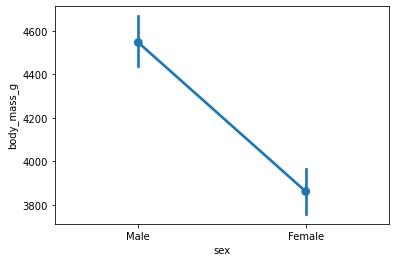

In [14]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [15]:
desvpad = pg.groupby('sex')['body_mass_g'].var().mean()**.5
Média_A = pg.groupby('sex')['body_mass_g'].mean()['Male']
Média_B = pg.groupby('sex')['body_mass_g'].mean()['Female']

diferença = Média_A - Média_B      # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao          # Estatística do teste
RC = st.t.ppf(.95, 18)             # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, 18)          # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

diferença: 683.41
desvio padrão: 729.43
erro padrão: 326.21
estatística do teste: 2.09
região crítica: 1.73 ou mais
p-value: 0.02529 ou mais


**Conclusão:** Como p-value encontrado é menor que 5% podemos induzir que há diferença de peso entre machos e fêmeas.

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

A probabilidade para valores entre 1,73 e inf é de 5,00%


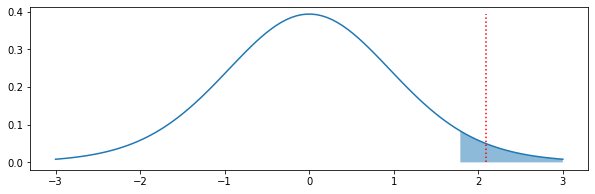

In [16]:
fig, ax = plt.subplots(figsize=(10,3))

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de X e Y para plotar a densidade
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = st.t.pdf(x, 18)

# low = início da região crítica do teste
low = st.t.ppf(.95, 18)
high = np.inf

# Gráfico da densidade
ax.plot(x, y)
# Esta linha de referência marca o valor observado da estatística do teste
ax.vlines(x=[t], 
             ymin=0, ymax=y.max(), 
             colors='r', linestyles='dotted')

# área 
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)

# Probabilidade de X pertencer à área
prob_area = st.t.cdf(high, 18) - st.t.cdf(low, 18)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

**Adelie**

In [17]:
desvpad = pg.loc[pg['species'] == 'Adelie'].groupby('sex')['body_mass_g'].var().mean()**.5
Média_A = pg.loc[pg['species'] == 'Adelie'].groupby('sex')['body_mass_g'].mean()['Male']
Média_B = pg.loc[pg['species'] == 'Adelie'].groupby('sex')['body_mass_g'].mean()['Female']

diferença = Média_A - Média_B      # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao          # Estatística do teste
RC = st.t.ppf(.95, 18)             # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, 18)          # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

p_value_adelie = p_value

diferença: 674.66
desvio padrão: 310.52
erro padrão: 138.87
estatística do teste: 4.86
região crítica: 1.73 ou mais
p-value: 0.00006 ou mais


**Gentoo**

In [18]:
desvpad = pg.loc[pg['species'] == 'Gentoo'].groupby('sex')['body_mass_g'].var().mean()**.5
Média_A = pg.loc[pg['species'] == 'Gentoo'].groupby('sex')['body_mass_g'].mean()['Male']
Média_B = pg.loc[pg['species'] == 'Gentoo'].groupby('sex')['body_mass_g'].mean()['Female']

diferença = Média_A - Média_B      # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao          # Estatística do teste
RC = st.t.ppf(.95, 18)             # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, 18)          # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

p_value_gentoo = p_value

diferença: 805.09
desvio padrão: 297.79
erro padrão: 133.17
estatística do teste: 6.05
região crítica: 1.73 ou mais
p-value: 0.00001 ou mais


**Chinstrap**

In [19]:
desvpad = pg.loc[pg['species'] == 'Chinstrap'].groupby('sex')['body_mass_g'].var().mean()**.5
Média_A = pg.loc[pg['species'] == 'Chinstrap'].groupby('sex')['body_mass_g'].mean()['Male']
Média_B = pg.loc[pg['species'] == 'Chinstrap'].groupby('sex')['body_mass_g'].mean()['Female']

diferença = Média_A - Média_B      # Numerador da fórmula
erro_padrao = desvpad*((2/10)**.5) # variância amostral*raiz(2/n)
t = diferença/erro_padrao          # Estatística do teste
RC = st.t.ppf(.95, 18)             # Região crítica: sob h0, t está na RC 5% das vezes
p_value=1-st.t.cdf(t, 18)          # p-value: a menor significância para a qual rejeitamos o teste

print(f'diferença: {diferença:.2f}')
print(f'desvio padrão: {desvpad:.2f}')
print(f'erro padrão: {erro_padrao:.2f}')
print(f'estatística do teste: {t:.2f}')
print(f'região crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value:.5f} ou mais')

p_value_chinstrap = p_value

diferença: 411.76
desvio padrão: 326.01
erro padrão: 145.79
estatística do teste: 2.82
região crítica: 1.73 ou mais
p-value: 0.00562 ou mais


**P-value associado a cada raça:**

In [20]:
print(f'p-value associado a raça Adelie: {p_value_adelie:.5f}')
print(f'p-value associado a raça Gentoo: {p_value_gentoo:.5f}')
print(f'p-value associado a raça Chinstrap: {p_value_chinstrap:.5f}')

p-value associado a raça Adelie: 0.00006
p-value associado a raça Gentoo: 0.00001
p-value associado a raça Chinstrap: 0.00562
